# Boston House Pricing Data

Select those features which are helpful and important and gives imp info in order to predict house prices

In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [2]:
print(np.__version__)
print(pd.__version__)
print(sklearn.__version__)
print(matplotlib.__version__)

1.17.4
0.25.3
0.22.1
3.2.1


In [3]:
data = pd.read_csv('D:\\PycharmProjects\\UdemyML\\data\\housing.csv',delim_whitespace = True, header = None)

In [4]:
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [5]:
col = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']

In [6]:
data.columns = col

In [7]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [8]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


CRIM: This is the per capita crime rate by town.

ZN: This is the proportion of residential land zoned for lots larger than 25,000 sq.ft.
    
INDUS: This is the proportion of non-retail business acres per town.
    
CHAS: This is the Charles River dummy variable (this is equal to 1 if tract bounds river; 0 otherwise)
    
NOX: This is the nitric oxides concentration (parts per 10 million)
    
RM: This is the average number of rooms per dwelling

AGE: This is the proportion of owner-occupied units built prior to 1940

DIS: This is the weighted distances to five Boston employment centers

RAD: This is the index of accessibility to radial highways

TAX: This is the full-value property-tax rate per 10,000 doller

PTRATIO: This is the pupil-teacher ratio by town

B: This is calculated as 1000(Bk — 0.63)², where Bk is the proportion of people of African American descent by town

LSTAT: This is the percentage lower status of the population

MEDV: This is the median value of owner-occupied homes in 1000s dollers

### Import data using sklearn

In [9]:
from sklearn.datasets import load_boston

boston_data = load_boston()


In [10]:
boston_data.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [11]:
boston_data.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [12]:
boston_data.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [13]:
boston_data.feature_names # feature name or column name

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [14]:
boston_data.DESCR # shows description

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [15]:
boston_data.filename   # shows location of data

'c:\\users\\sneha\\appdata\\local\\programs\\python\\python37\\lib\\site-packages\\sklearn\\datasets\\data\\boston_house_prices.csv'

### EDA

In [16]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


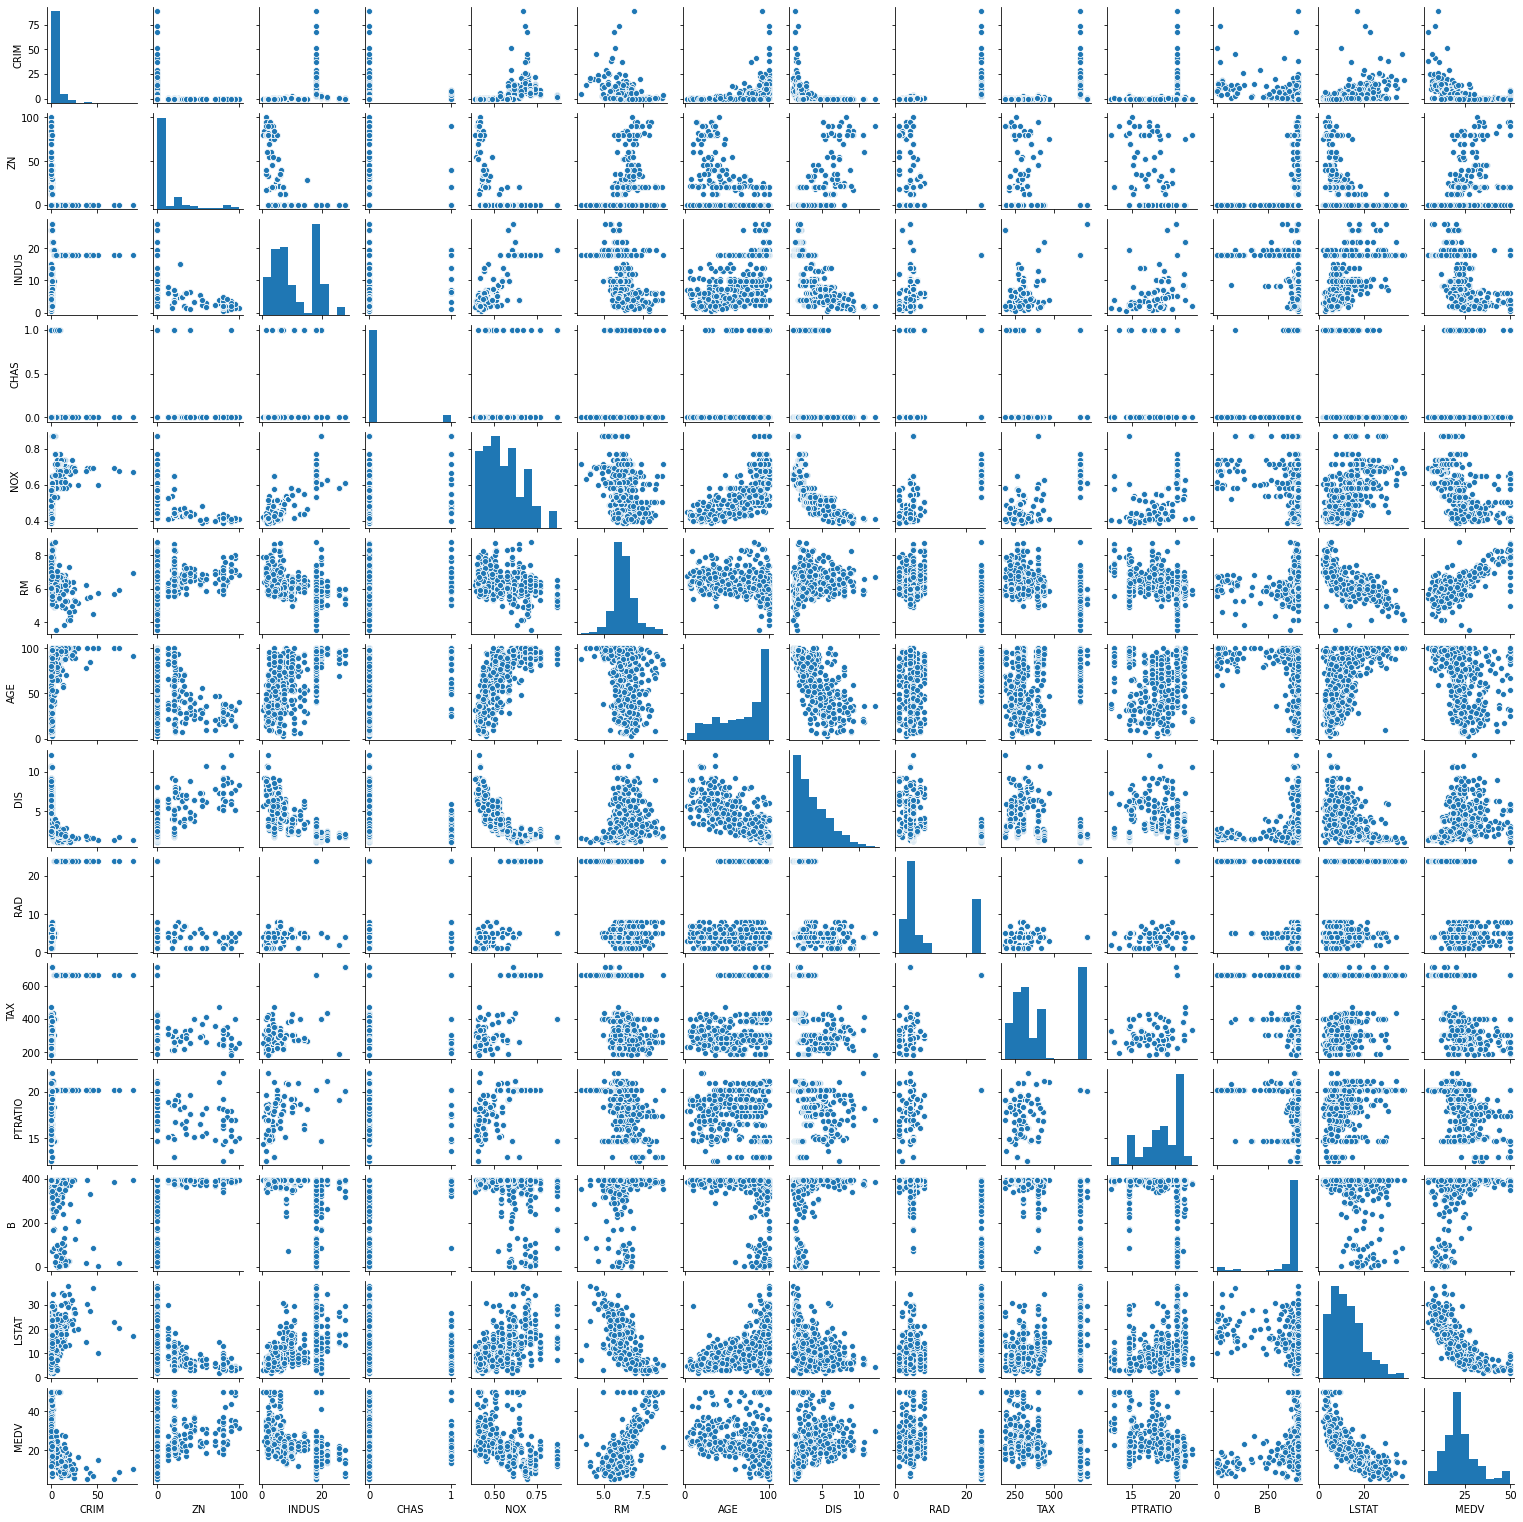

In [17]:
sns.pairplot(data,height = 1.5)
plt.show()

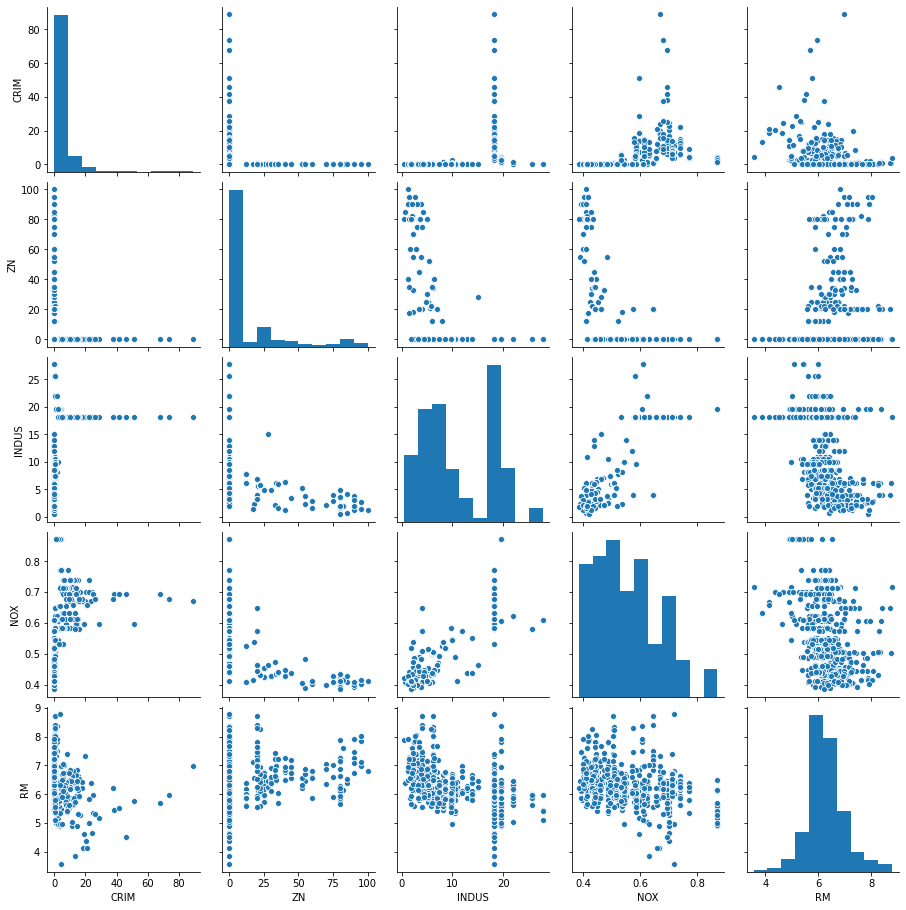

In [18]:
c = ['CRIM','ZN','INDUS','NOX','RM']
sns.pairplot(data[c],height = 2.5)
plt.show()

### Correlation analysis and feature selection

In [19]:
pd.options.display.float_format = '{:,.2f}'.format

In [20]:
data.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60,-0.38
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50,0.25
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54,-0.47


crim Vs medv ----> -0.39 (inversely correlated) places where criminal cases are more having less prices.

rm Vs medv -----> 0.70 (strong +ve correlated) no. of rooms are more then prices are high. 

lstate Vs medv ----> -0.74 (strong -ve correlated) lower class population (based on income) is more then less price.

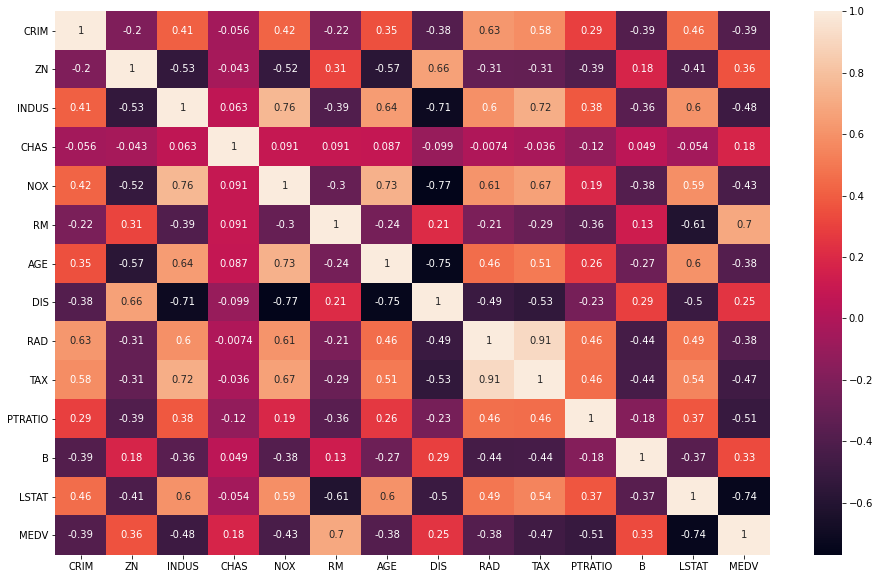

In [21]:
plt.figure(figsize = (16,10))
sns.heatmap(data.corr(),annot = True)
plt.show()

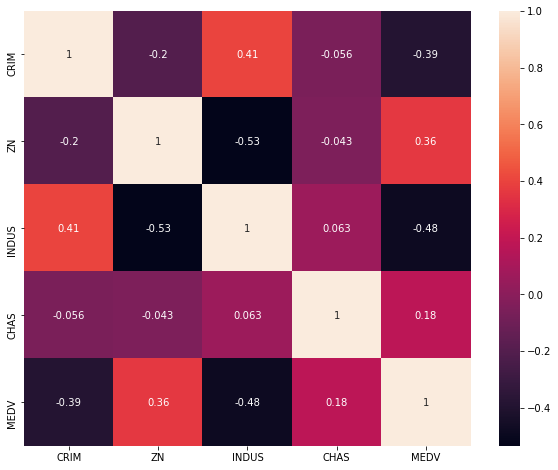

In [22]:
plt.figure(figsize = (10,8))
sns.heatmap(data[['CRIM','ZN','INDUS','CHAS','MEDV']].corr(),annot = True)
plt.show()

## Linear Regression with Scikit Learn

In [23]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.01,18.00,2.31,0,0.54,6.58,65.20,4.09,1,296.00,15.30,396.90,4.98,24.00
1,0.03,0.00,7.07,0,0.47,6.42,78.90,4.97,2,242.00,17.80,396.90,9.14,21.60
2,0.03,0.00,7.07,0,0.47,7.18,61.10,4.97,2,242.00,17.80,392.83,4.03,34.70
3,0.03,0.00,2.18,0,0.46,7.00,45.80,6.06,3,222.00,18.70,394.63,2.94,33.40
4,0.07,0.00,2.18,0,0.46,7.15,54.20,6.06,3,222.00,18.70,396.90,5.33,36.20


In [24]:
x = data['RM'].values.reshape(-1,1) # reshaping is needed  to enter in sklearn model

In [25]:
y = data['MEDV'].values

In [26]:
from sklearn.linear_model import LinearRegression  # choose ML model (linear regression in this case)

In [27]:
model = LinearRegression()  # instantiate the model

In [28]:
model.fit(x,y)  # fit the model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
model.coef_

array([9.10210898])

In [30]:
model.intercept_

-34.670620776438554

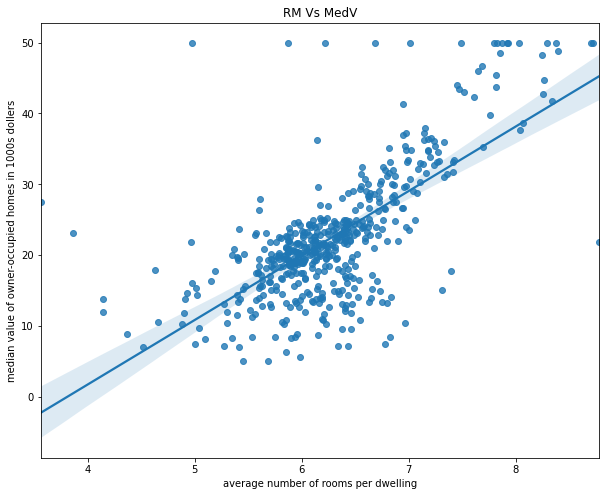

In [31]:
plt.figure(figsize = (10,8))
sns.regplot(x,y)
plt.xlabel("average number of rooms per dwelling")
plt.ylabel("median value of owner-occupied homes in 1000s dollers")
plt.title("RM Vs MedV")
plt.show()

##### As room no. increses house prices increases (+ve or increasing regression line)

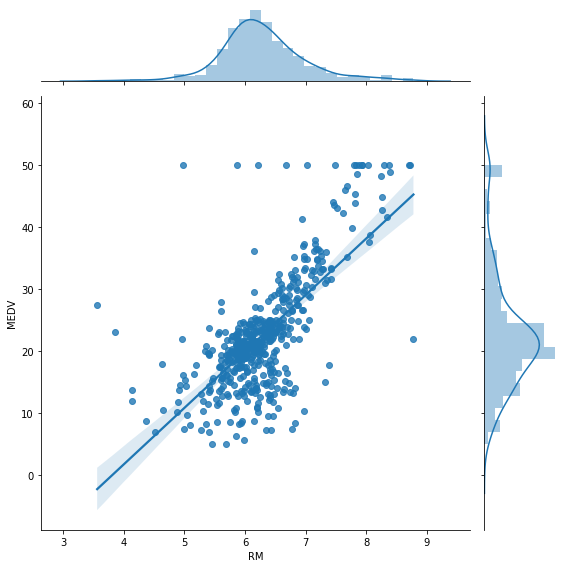

In [32]:
sns.jointplot(x = 'RM',y = 'MEDV',data = data,kind = 'reg', height = 8)
plt.show()

In [33]:
model.predict(np.array([5]).reshape(-1,1))  # if we have 5 rooms ?

array([10.83992413])

##### then we get house price approx 10 (can be seen in plot)

In [34]:
model.predict(np.array([7]).reshape(-1,1)) # if we have 7 rooms?

array([29.04414209])

##### then we get house price approx 29 (can be seen in plot)

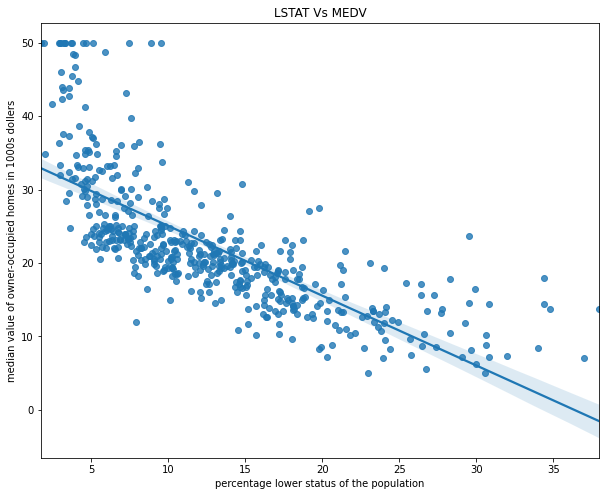

In [35]:
x1 = data['LSTAT'].values.reshape(-1,1)
y1 = data['MEDV'].values
model1 = LinearRegression()
model1.fit(x1,y1)
plt.figure(figsize = (10,8))
sns.regplot(x1,y1)
plt.xlabel("percentage lower status of the population")
plt.ylabel("median value of owner-occupied homes in 1000s dollers")
plt.title("LSTAT Vs MEDV")
plt.show()

##### As lower status increses house prices decreases (-ve or decreasing regression line)

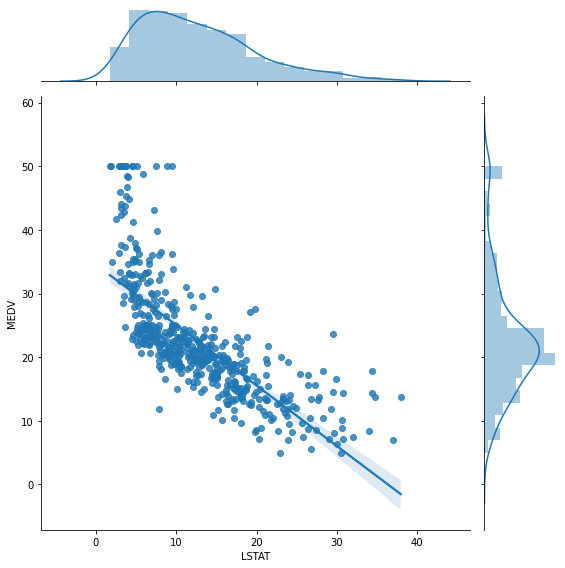

In [36]:
sns.jointplot(x = 'LSTAT',y = 'MEDV',data = data, kind = 'reg',height=8)
plt.show()

In [37]:
model1.predict(np.array([10]).reshape(-1,1)) # if lower status % population is 10?

array([25.05334734])

In [38]:
model1.predict(np.array([30]).reshape(-1,1)) # if lower status % population is 30?

array([6.05236027])

## 5 ML Steps:

from Jacob T. VanderPlas text: Python datascience handbook

Basics of API: steps in using the scikit learn estimator API is as follows,

(1) Choose a class of model by importing appropriate estimator class from sklearn.

(2) Choose model hyperparameters by instantiating this class with desired value.

(3) Arrange data into feature matrix and target vector (x,y).

(4) Fit the model to data by calling fit() method of model instance.

(5) Apply the model to new data........[a] for supervised learning, we predict labels for new data using predict() method. [b] for unsupervised learning, we transform or infer the properties of data using transform() or predict() method.

## Robust Regression:
In linear regression lot of empirical (reward) data is have  a tendency to actually violate the assumptions of linear regression and  not withstanding one of the most basic one is the susceptibility of linear regression to outliers.

Handle the issue of Outliers: (using Robust Regression)

mean value of data is mostly affected  by outliers. An outlier is an observation that diverges from an overall pattern on a sample. Outliers are extreme values that deviate from other observations on data , they may indicate a variability in a measurement, experimental errors or a novelty.



In [39]:
rx = data['RM'].values.reshape(-1,1)
ry = data['MEDV'].values

## RANSAC:

RANSAC (RANdom SAmple Consensus) fits a model from random subsets of inliers from the complete data set.

RANSAC is a non-deterministic algorithm producing only a reasonable result with a certain probability, which is dependent on the number of iterations (see max_trials parameter). It is typically used for linear and non-linear regression problems and is especially popular in the field of photogrammetric computer vision.

*The algorithm splits the complete input sample data into a set of inliers, which may be subject to noise, and outliers, which are e.g. caused by erroneous measurements or invalid hypotheses about the data. The resulting model is then estimated only from the determined inliers.*

In [40]:
from IPython.display import Image

Image(url = 'https://scikit-learn.org/stable/_images/sphx_glr_plot_ransac_001.png',width = 400,height = 400)

Each iteration performs the following steps:

1.Select min_samples random samples from the original data and check whether the set of data is valid (see is_data_valid).

2.Fit a model to the random subset (base_estimator.fit) and check whether the estimated model is valid (see is_model_valid).

3.Classify all data as inliers or outliers by calculating the residuals to the estimated model (base_estimator.predict(X) - y) - all data samples with absolute residuals smaller than the residual_threshold are considered as inliers.

4.Save fitted model as best model if number of inlier samples is maximal. In case the current estimated model has the same number of inliers, it is only considered as the best model if it has better score.

These steps are performed either a maximum number of times (max_trials) or until one of the special stop criteria are met (see stop_n_inliers and stop_score). The final model is estimated using all inlier samples (consensus set) of the previously determined best model.

The is_data_valid and is_model_valid functions allow to identify and reject degenerate combinations of random sub-samples. If the estimated model is not needed for identifying degenerate cases, is_data_valid should be used as it is called prior to fitting the model and thus leading to better computational performance.

In [41]:
from sklearn.linear_model import RANSACRegressor

In [42]:
rmodel = RANSACRegressor()

In [43]:
rmodel.fit(rx,ry)

RANSACRegressor(base_estimator=None, is_data_valid=None, is_model_valid=None,
                loss='absolute_loss', max_skips=inf, max_trials=100,
                min_samples=None, random_state=None, residual_threshold=None,
                stop_n_inliers=inf, stop_probability=0.99, stop_score=inf)

In [44]:
inlier_mask = rmodel.inlier_mask_  # data which is inlier
outlier_mask = np.logical_not(inlier_mask) # data which is outlier (opposite of inlier)

In [45]:
line_x = np.arange(3,10,1)   # create data from 3 to 9
line_y = rmodel.predict(line_x.reshape(-1,1)) # predict 

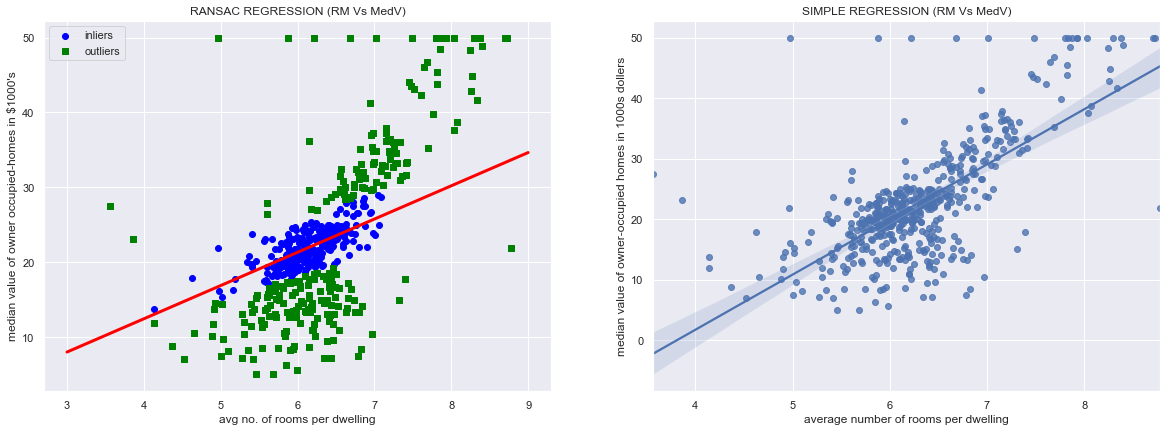

In [46]:
# set background of plot
sns.set(style='darkgrid',context='notebook')
# set size of plot
plt.figure(figsize=(20,15))

################ RANSAC REGRESSION PLOT #############################
plt.subplot(2,2,1)
# scatter plot for all data points
plt.scatter(rx[inlier_mask],ry[inlier_mask],c = 'blue',marker = 'o',label = 'inliers')
plt.scatter(rx[outlier_mask],ry[outlier_mask],c = 'green',marker = 's',label = 'outliers')

# regression line plot
plt.plot(line_x,line_y,color = 'red',linewidth = 3)

# adding labels AND title
plt.xlabel('avg no. of rooms per dwelling')
plt.ylabel("median value of owner occupied-homes in $1000's")
plt.title("RANSAC REGRESSION (RM Vs MedV)")
# setting location of legend
plt.legend(loc='upper left')
#plt.show() # finally show the plot


################ SIMPLE REGRESSION PLOT #############################
plt.subplot(2,2,2)
sns.regplot(rx,ry)
plt.xlabel("average number of rooms per dwelling")
plt.ylabel("median value of owner-occupied homes in 1000s dollers")
plt.title("SIMPLE REGRESSION (RM Vs MedV)")
plt.show()

RANSAC performs 2 things during fitting process:

1.calculate and identify the outliers and just drop those together.
2.narrowing down the inliers.

#### It just disallow the outliers to have any impact in the regression line.

In [47]:
rmodel.estimator_.coef_

array([4.44079589])

In [48]:
rmodel.estimator_.intercept_

-5.328512617049778

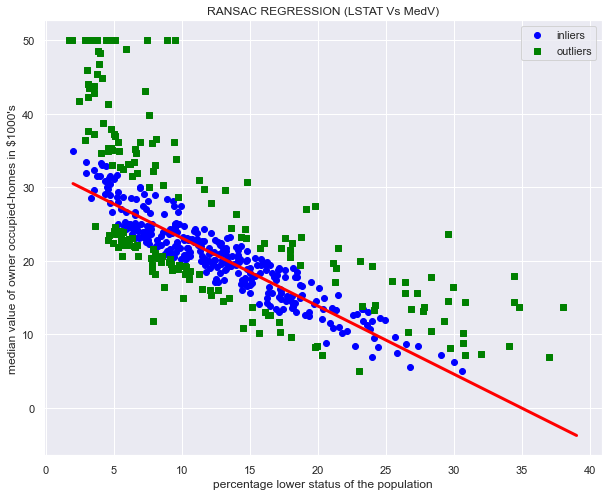

In [49]:
rx2 = data['LSTAT'].values.reshape(-1,1)
ry2 = data['MEDV'].values

rmodel2 = RANSACRegressor()
rmodel2.fit(rx2,ry2)

i_mask = rmodel2.inlier_mask_
o_mask = np.logical_not(i_mask)

line_x = np.arange(2,40,1)   # create data from 3 to 9
line_y = rmodel2.predict(line_x.reshape(-1,1)) # predict 

# set background of plot
sns.set(style='darkgrid',context='notebook')
# set size of plot
plt.figure(figsize=(10,8))
# scatter plot for all data points
plt.scatter(rx2[i_mask],ry2[i_mask],c = 'blue',marker = 'o',label = 'inliers')
plt.scatter(rx2[o_mask],ry2[o_mask],c = 'green',marker = 's',label = 'outliers')
# regression line plot
plt.plot(line_x,line_y,color = 'red',linewidth = 3)
# adding labels AND title
plt.xlabel('percentage lower status of the population')
plt.ylabel("median value of owner occupied-homes in $1000's")
plt.title("RANSAC REGRESSION (LSTAT Vs MedV)")
# setting location of legend
plt.legend(loc='upper right')
plt.show() # finally show the plot


In [50]:
### READ : LINEAR REGRESSION ASSUMPTIONS (VERY IMP)